In [4]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torchvision 
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def imshow(inp, title=None):
    """ IMshow for Tensor"""
    inp=inp.numpy().transpose((1,2,0))
    mean=np.array([0.485, 0.456, 0.406])
    std=np.array([0.299,0.244,0.255])
    inp= std * inp + mean
    inp=np.clip(inp,0,1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

In [6]:
def data_load():
    data_transform=transforms.Compose([transforms.Resize([512,512]), transforms.ToTensor(), transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])
    data_dir='E:/DC'
    image_datasets=datasets.ImageFolder(data_dir,transform=data_transform)
    train_loader=torch.utils.data.DataLoader(dataset=image_datasets, batch_size=2, shuffle=True)
    return train_loader,image_datasets
    

In [8]:
# model class
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.cnn1=nn.Conv2d(in_channels=3, out_channels=16,kernel_size=5,stride=1,padding=2)
        self.relu=nn.ReLU()
        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        self.cnn2=nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2=nn.ReLU()
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1=nn.Linear(32*128*128,7)
    
    def forward(self,x):
        out=self.cnn1(x)
        out=self.relu(out)
        out=self.maxpool1(out)
        out=self.cnn2(out)
        out=self.relu2(out)
        out=self.maxpool2(out)
        out=out.view(out.size(0),-1)
        out=self.fc1(out)
        return out

In [9]:
train_loader,image_datasets=data_load()

In [10]:
model=CNNModel()

In [11]:
criterion=nn.CrossEntropyLoss()
learning_rate=0.001
optimizer=optim.SGD(model.parameters(),lr=learning_rate)


In [12]:
# model training
num_epochs=5
iter=0
batch_size=2

for epoch in range(num_epochs):
    for i, (images, labels)in enumerate(train_loader):
        images=Variable(images)
        labels=Variable(labels)
        optimizer.zero_grad()
        output=model(images)
        loss=criterion(output, labels)
        loss.backward()
        optimizer.step()
        iter =iter +1
        print('Epoch [%d/%d],Iter [%d/%d] Loss : %.4f' %(epoch+1,num_epochs,i+1,len(image_datasets)//batch_size,loss[0]))
        


C:\Users\admin\Anaconda3\envs\pyt\lib\site-packages\ipykernel_launcher.py:15: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  from ipykernel import kernelapp as app


Epoch [1/5],Iter [1/8] Loss : 1.9033
Epoch [1/5],Iter [2/8] Loss : 52.9433
Epoch [1/5],Iter [3/8] Loss : 1.5168
Epoch [1/5],Iter [4/8] Loss : 1.2186
Epoch [1/5],Iter [5/8] Loss : 0.9634
Epoch [1/5],Iter [6/8] Loss : 0.9220
Epoch [1/5],Iter [7/8] Loss : 0.5736
Epoch [1/5],Iter [8/8] Loss : 2.5010
Epoch [2/5],Iter [1/8] Loss : 0.2922
Epoch [2/5],Iter [2/8] Loss : 0.8909
Epoch [2/5],Iter [3/8] Loss : 1.9668
Epoch [2/5],Iter [4/8] Loss : 0.8132
Epoch [2/5],Iter [5/8] Loss : 0.9724
Epoch [2/5],Iter [6/8] Loss : 0.7361
Epoch [2/5],Iter [7/8] Loss : 0.8733
Epoch [2/5],Iter [8/8] Loss : 0.7659
Epoch [3/5],Iter [1/8] Loss : 0.1645
Epoch [3/5],Iter [2/8] Loss : 0.0665
Epoch [3/5],Iter [3/8] Loss : 0.4729
Epoch [3/5],Iter [4/8] Loss : 0.4727
Epoch [3/5],Iter [5/8] Loss : 0.3921
Epoch [3/5],Iter [6/8] Loss : 0.1552
Epoch [3/5],Iter [7/8] Loss : 1.2728
Epoch [3/5],Iter [8/8] Loss : 0.9509
Epoch [4/5],Iter [1/8] Loss : 0.2681
Epoch [4/5],Iter [2/8] Loss : 0.5276
Epoch [4/5],Iter [3/8] Loss : 0.1192


### Testing images

In [13]:
def data_load1():
    data_transform=transforms.Compose([transforms.Resize([512,512]), transforms.ToTensor(), transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])
    data_dir='E:/ctt'
    image_datasets=datasets.ImageFolder(data_dir,transform=data_transform)
    train_loader=torch.utils.data.DataLoader(dataset=image_datasets, batch_size=2, shuffle=True)
    return train_loader

In [14]:
train_loader22=data_load1()

In [15]:
imagex=train_loader22
print(imagex)

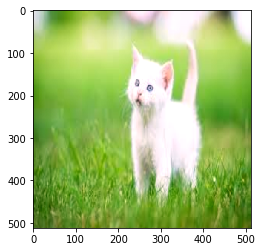

tensor([1])
prediction-- cat


In [16]:
labels_h=('dog','cat')
for i , (a,b) in enumerate(train_loader22):
    imshow(torchvision.utils.make_grid(a))
    images1=Variable(a)
    labels1=Variable(b)
    outputs1=model(a)
    _,predicted=torch.max(outputs1.data,1)
    print(predicted)
    print("prediction--", labels_h[predicted[0]])